# Imports

In [1]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re

# Load dataset

In [2]:
df = pd.read_csv('amazon_sample_05m.csv')
print(df.shape)

(500000, 4)


In [3]:
df = df.drop(['review_title', 'Unnamed: 0'], axis=1)

In [4]:
df.head()

,label,text
0,2,I bought this to wear as a joke to my brothers...
1,1,Note: Partially similar review of Vol 1.They s...
2,2,This book is a great YA read. Realistic & hear...
3,2,Well where to begin. I purchased the book and ...
4,1,"I have to say, I've purchased many books in my..."


In [5]:
# Check for null values after dropping
print(np.sum(df.isnull().any(axis=1)))

# Drop null values in the data frame
df = df.dropna()

0


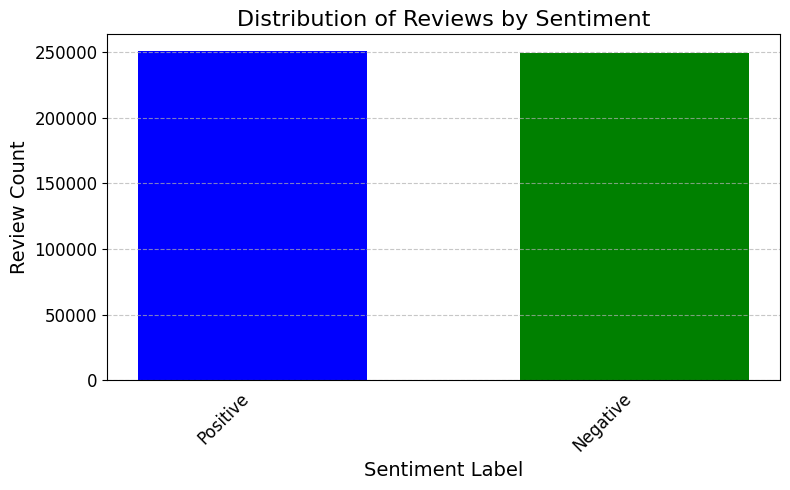

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' has a column named 'label'

# Get the value counts with labels renamed (dictionary comprehension)
label_counts = df['label'].value_counts().rename({1: 'Negative', 2: 'Positive'})

# Create the bar plot with sorted labels and custom styling
fig, ax = plt.subplots(figsize=(8, 5))  # Create a figure and axis for better control
ax.bar(label_counts.index, label_counts.values, color=['blue', 'green'], width=0.6)  # Set colors and width

# Customize labels and title
ax.set_xlabel('Sentiment Label', fontsize=14)
ax.set_ylabel('Review Count', fontsize=14)
plt.title('Distribution of Reviews by Sentiment', fontsize=16)

# Add grid lines and rotate x-axis labels for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate and right-align x-axis labels

# Increase font size for ticks and labels
plt.tick_params(bottom=False, labelsize=12)  # Remove bottom ticks and adjust label size

# Show the plot
plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()



In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   500000 non-null  int64 
 1   text    500000 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.6+ MB


# Preprocessing

In [101]:
# Download the 'stopwords' resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\mohamed
[nltk_data]     mowina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
# Load stop words
stop_words = stopwords.words('english')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  """Applies preprocessing steps to the given text."""
  # Lowercase text
  text = text.lower()

  # Remove numbers (optional)
  text = re.sub('[0-9]+', '', text)  # Consider keeping numbers for specific domains

  # Remove special characters and some punctuation
  text = re.sub(r"[^\w\s!@#\$%&*\(\)_\+=\^:\.,;]", " ", text)  # Preserve negation words, some punctuation
  
  # Lemmatization (preferred)
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

  # Clean URLs
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)

  # Clean Emails
  text = re.sub('@[^\s]+', ' ', text)
  
  # Stop word removal (optional)
  text = ' '.join([word for word in text.split() if word not in stop_words])

  return text


In [103]:
# Sample text
text = df['text'][50]
print("Text:", text)

# Preprocess the sample text
preprocessed_text = preprocess_text(text)
print("Preprocessed text:", preprocessed_text)


Text: I was really hoping that this would work well with my Motorola Rarz Maxx. I could hear the other person well, but others could barely understand me from their end. After much research at Plantronics, they said that this product will not function correctly with modern Smart Phones. Even though it has a 2.5 to 3.5 mm converter cord, the required voltage is not present with Smart Phones, whether they are iPhones, Droid OS, or other. They need USB voltage from a computer, for example. Call Plantronics and they will verify this. Plantronics is not making an appropriate 3.5 mm wired headset.I could not find a good quality Bluetooth headset until my recent purchase of the Plantronics Voyager Pro HD. It is not 100%, but amazingly good. It is available from Amazon.
Preprocessed text: wa really hoping would work well motorola rarz maxx. could hear person well, others could barely understand end. much research plantronics, said product function correctly modern smart phones. even though ha 

In [ ]:
df['text'] = df['text'].astype(str)

# Clean text
df['text'] = df['text'].apply(lambda text: preprocess_text(text))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   500000 non-null  int64 
 1   text    500000 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.6+ MB


## Vectorization

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

In [ ]:
vectorizer.fit(df['text'])

TfidfVectorizer(max_features=5000, stop_words='english')

# Preparing data for fitting

In [ ]:
X = df['text']
Y = df['label']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Models evaluating

In [ ]:
import pickle

In [ ]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train_tfidf, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test_tfidf, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test_tfidf)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Load & Evaluate models

## Naive-Bayes Model

In [ ]:
# Load Naive-Bayes Model as nb
with open('NB_model.sav', 'rb') as f:
    nb = pickle.load(f)

print(nb)

BernoulliNB()


Accuracy of model on training data : 81.85575
Accuracy of model on testing data : 81.623 

              precision    recall  f1-score   support

           1       0.83      0.79      0.81     49948
           2       0.80      0.84      0.82     50052

    accuracy                           0.82    100000
   macro avg       0.82      0.82      0.82    100000
weighted avg       0.82      0.82      0.82    100000



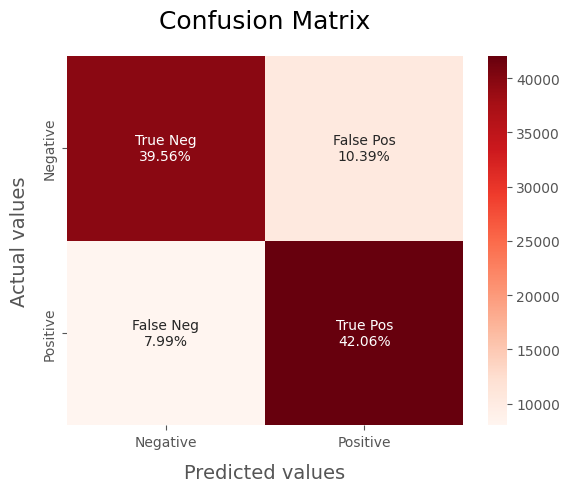

In [ ]:
model_Evaluate(nb)

## Random-Forest Model

In [ ]:
# Load Random-Forest Model as rf
with open('RF_model.sav', 'rb') as f:
    rf = pickle.load(f)

print(rf)

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=20)


Accuracy of model on training data : 86.31875
Accuracy of model on testing data : 79.987 

              precision    recall  f1-score   support

           1       0.83      0.76      0.79     49948
           2       0.78      0.84      0.81     50052

    accuracy                           0.80    100000
   macro avg       0.80      0.80      0.80    100000
weighted avg       0.80      0.80      0.80    100000



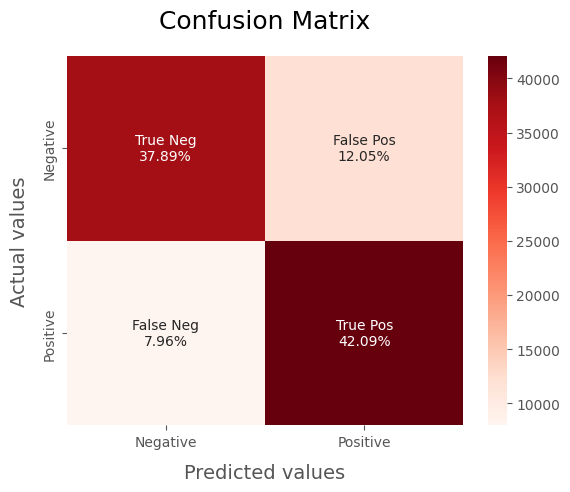

In [ ]:
model_Evaluate(rf)

## Logistic Regression

In [ ]:
# Load Logistic Regression Model as lg
with open('LR_model.sav', 'rb') as f:
    lg = pickle.load(f)

print(lg)

LogisticRegression()


Accuracy of model on training data : 86.30225
Accuracy of model on testing data : 85.577 

              precision    recall  f1-score   support

           1       0.86      0.85      0.85     49948
           2       0.85      0.86      0.86     50052

    accuracy                           0.86    100000
   macro avg       0.86      0.86      0.86    100000
weighted avg       0.86      0.86      0.86    100000



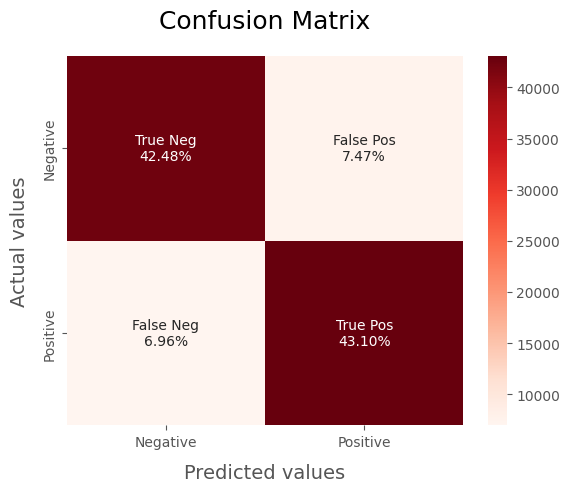

In [ ]:
model_Evaluate(lg)

## SVM Model

In [ ]:
# Load SVM Model as svm
with open('svm_model.sav', 'rb') as f:
    svm = pickle.load(f)

print(svm)

SVC(kernel='linear')


Accuracy of model on training data : 86.44175
Accuracy of model on testing data : 85.583 

              precision    recall  f1-score   support

           1       0.86      0.85      0.85     49948
           2       0.85      0.86      0.86     50052

    accuracy                           0.86    100000
   macro avg       0.86      0.86      0.86    100000
weighted avg       0.86      0.86      0.86    100000



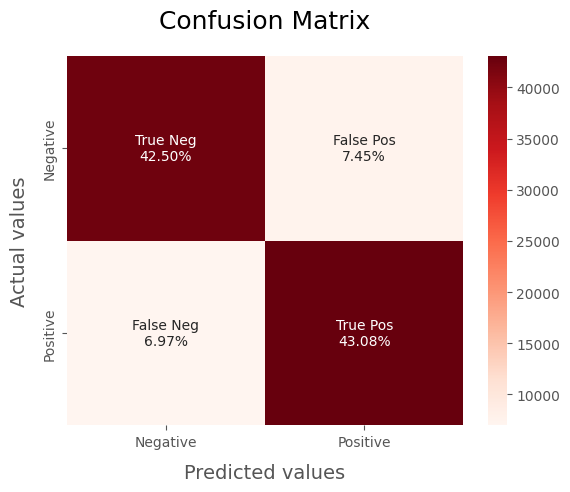

In [ ]:
model_Evaluate(svm)

## roBERTa

In [61]:
# Load SVM Model as svm
with open('df_roberta.pkl', 'rb') as f:
    df_roberta = pickle.load(f)

print(df_roberta.head())

   label                                               text  roBERTa_labels
0      1  I bought this to wear as a joke to my brothers...             1.0
1      0  Note: Partially similar review of Vol 1.They s...             1.0
2      1  This book is a great YA read. Realistic & hear...             1.0
3      1  Well where to begin. I purchased the book and ...             1.0
4      0  I have to say, I've purchased many books in my...             0.0


In [64]:
from sklearn.metrics import accuracy_score

Accuracy of model on testing data : 88.49%

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     49798
           1       0.86      0.93      0.89     50202

    accuracy                           0.88    100000
   macro avg       0.89      0.88      0.88    100000
weighted avg       0.89      0.88      0.88    100000



Text(0.5, 1.0, 'Confusion Matrix')

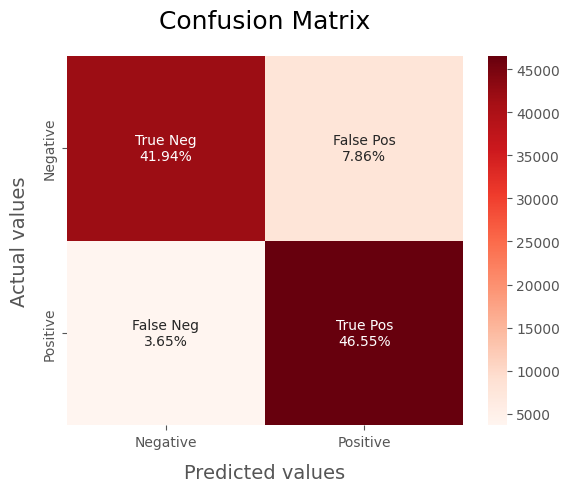

In [69]:
acc_test= accuracy_score(df_roberta['label'], df_roberta['roBERTa_labels'])
print(f'Accuracy of model on testing data : {acc_test:.2%}\n')

# Print the evaluation metrics for the dataset.
print(classification_report(df_roberta['label'], df_roberta['roBERTa_labels']))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(df_roberta['label'], df_roberta['roBERTa_labels'])

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## RNN Model

In [70]:
from tensorflow import keras

# Specify the path to your h5 model file
model_path = 'amazon_sample_model2.h5'

# Load the model
rnn = keras.models.load_model(model_path)